In [44]:
# importing the necessary packages
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [45]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Building_Permits_S (1).csv', index_col=0,low_memory=False)
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Primary Address Flag,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Point Source,Record ID,data_as_of,data_loaded_at,Days_to_Issue
0,M871747,8,otc alterations permit,2018-01-02,6511,028,1141,NaN,Dolores,St,...,Y,8.0,Mission,94110.0,POINT (-122.424654995 37.751101131),eas_address_point,1492192205733,12/02/2024 11:55:00 PM,12/03/2024 03:30:15 AM,0.0
1,201801027649,8,otc alterations permit,2018-01-02,0127,138,999,NaN,Green,St,...,Y,3.0,Nob Hill,94133.0,POINT (-122.415217686 37.798446655),eas_address_point,149216460085,12/02/2024 11:55:00 PM,12/03/2024 03:30:15 AM,NaN
2,201801027679,8,otc alterations permit,2018-01-02,0080,031,101,NaN,Lombard,St,...,Y,3.0,Financial District/South Beach,94111.0,POINT (-122.404078374 37.803468742),eas_address_point,149220957997,12/02/2024 11:55:00 PM,12/03/2024 03:30:15 AM,0.0
3,201801027692,8,otc alterations permit,2018-01-02,1848,046,1420,NaN,06th,Av,...,Y,7.0,Inner Sunset,94122.0,POINT (-122.462613314 37.761912538),eas_address_point,1492221117196,12/02/2024 11:55:00 PM,12/03/2024 03:30:15 AM,0.0
4,201801027696,8,otc alterations permit,2018-01-02,0669,009,1156,NaN,Sutter,St,...,Y,3.0,Nob Hill,94109.0,POINT (-122.419424668 37.788106925),eas_address_point,1492229459018,12/02/2024 11:55:00 PM,12/03/2024 03:30:15 AM,0.0


In [46]:
print(df.isna().sum().sort_values())

Permit Number                                 0
Application Submission Method                 0
ADU                                           0
Filed Date                                    0
Current Status Date                           0
Current Status                                0
Record ID                                     0
Street Name                                   0
data_loaded_at                                0
Street Number                                 0
Lot                                           0
Block                                         0
Permit Creation Date                          0
Permit Type Definition                        0
Permit Type                                   0
data_as_of                                    0
Zipcode                                       6
Location                                     40
Neighborhoods - Analysis Boundaries          40
Supervisor District                          40
Point Source                            

In [47]:
df = df.dropna(subset=['Zipcode','Location','Neighborhoods - Analysis Boundaries','Neighborhoods - Analysis Boundaries','Supervisor District','Point Source','Description','Days_to_Issue'])
print(df.isna().sum().sort_values())
print(df.info())

Permit Number                                 0
data_as_of                                    0
Record ID                                     0
Point Source                                  0
Location                                      0
Zipcode                                       0
Neighborhoods - Analysis Boundaries           0
Supervisor District                           0
ADU                                           0
Application Submission Method                 0
Last Permit Activity Date                     0
data_loaded_at                                0
Issued Date                                   0
Filed Date                                    0
Days_to_Issue                                 0
Current Status                                0
Description                                   0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                   

In [58]:
# Defining target and features arrays
X = df[["Existing Construction Type","Number of Proposed Stories","Revised Cost"]].values
y = df['Days_to_Issue'].values
print(X.shape)
print(y.shape)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# Imputing missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print(X_train)
print('=================================================')
print(X_test)

# Performing linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
y_pred = regressor.predict(X_test)

# Output the results
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)
print("Predicted values:", y_pred)
print("Actual values:", y_test)




(75196, 3)
(75196,)
[[5.00000000e+00 2.00000000e+00 2.14480000e+04]
 [5.00000000e+00 1.00000000e+00 1.69680000e+04]
 [5.00000000e+00 2.00000000e+00 1.00000000e+04]
 ...
 [1.00000000e+00 1.20000000e+01 8.12120000e+04]
 [3.98873926e+00 6.82727949e+00 1.00000000e+00]
 [5.00000000e+00 1.00000000e+00 5.70000000e+04]]
[[5.00000000e+00 2.00000000e+00 1.50000000e+04]
 [5.00000000e+00 2.00000000e+00 5.00000000e+03]
 [1.00000000e+00 6.30000000e+01 1.00000000e+00]
 ...
 [1.00000000e+00 5.00000000e+00 1.25000000e+04]
 [3.98873926e+00 6.82727949e+00 1.00000000e+00]
 [5.00000000e+00 3.00000000e+00 5.00000000e+03]]
Coefficients: [ 6.26209027e+00 -5.26839659e-01  7.09433813e-06]
Intercept: 20.298767407997207
Predicted values: [50.66195452 50.59101114 -6.63003372 ... 24.01533861 41.67973821
 50.06417148]
Actual values: [ 6.  0.  6. ... 17.  0.  0.]


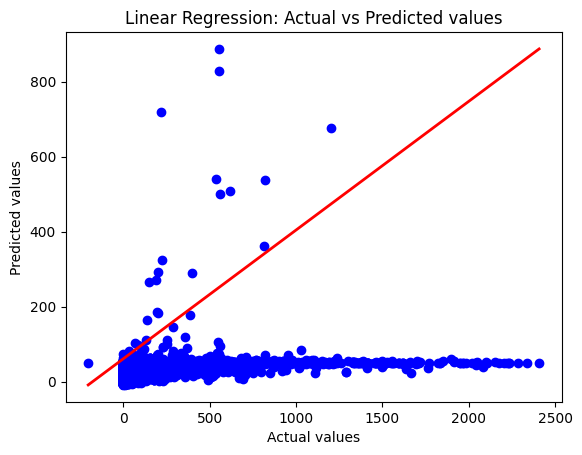

In [59]:

# Scatter plot of the actual data points
plt.scatter(y_test, y_pred, color='blue')

# Line of best fit (regression line)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linewidth=2)

# Adding labels and title
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression: Actual vs Predicted values')

# Show the plot
plt.show()





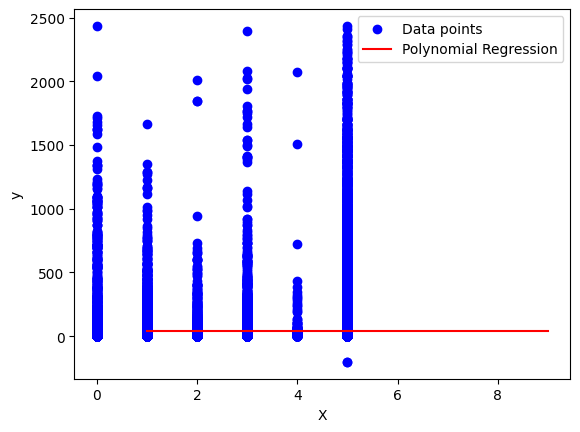

In [67]:
# polynomial regrssion using pipeline
X = df[["Existing Construction Type","Number of Proposed Stories","Revised Cost"]].values

X = np.nan_to_num(X)
y = np.nan_to_num(y)

# Create a polynomial regression model (degree 2 for a quadratic)
degree = 2
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('linear_regression', LinearRegression())
])

# Fit the model
pipeline.fit(X, y)

# Make predictions
X_predict = np.linspace(1, 9, 100).reshape(-1, 1)
X_predict = np.hstack([X_predict, X_predict, X_predict])
y_predict = pipeline.predict(X_predict)

# Plot the results
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X_predict[:, 0], y_predict, color='red', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

